<a href="https://colab.research.google.com/github/dkp3012/assignment/blob/main/Covid_19_PCA_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [114]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [115]:
country_data = pd.read_csv('/content/Country-data.csv')

In [116]:
country_data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [117]:
country_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [118]:
country_data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [119]:
round(100*(country_data.isnull().sum()/len(country_data.index)), 2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

In [120]:
country_data.columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

<Axes: xlabel='gdpp'>

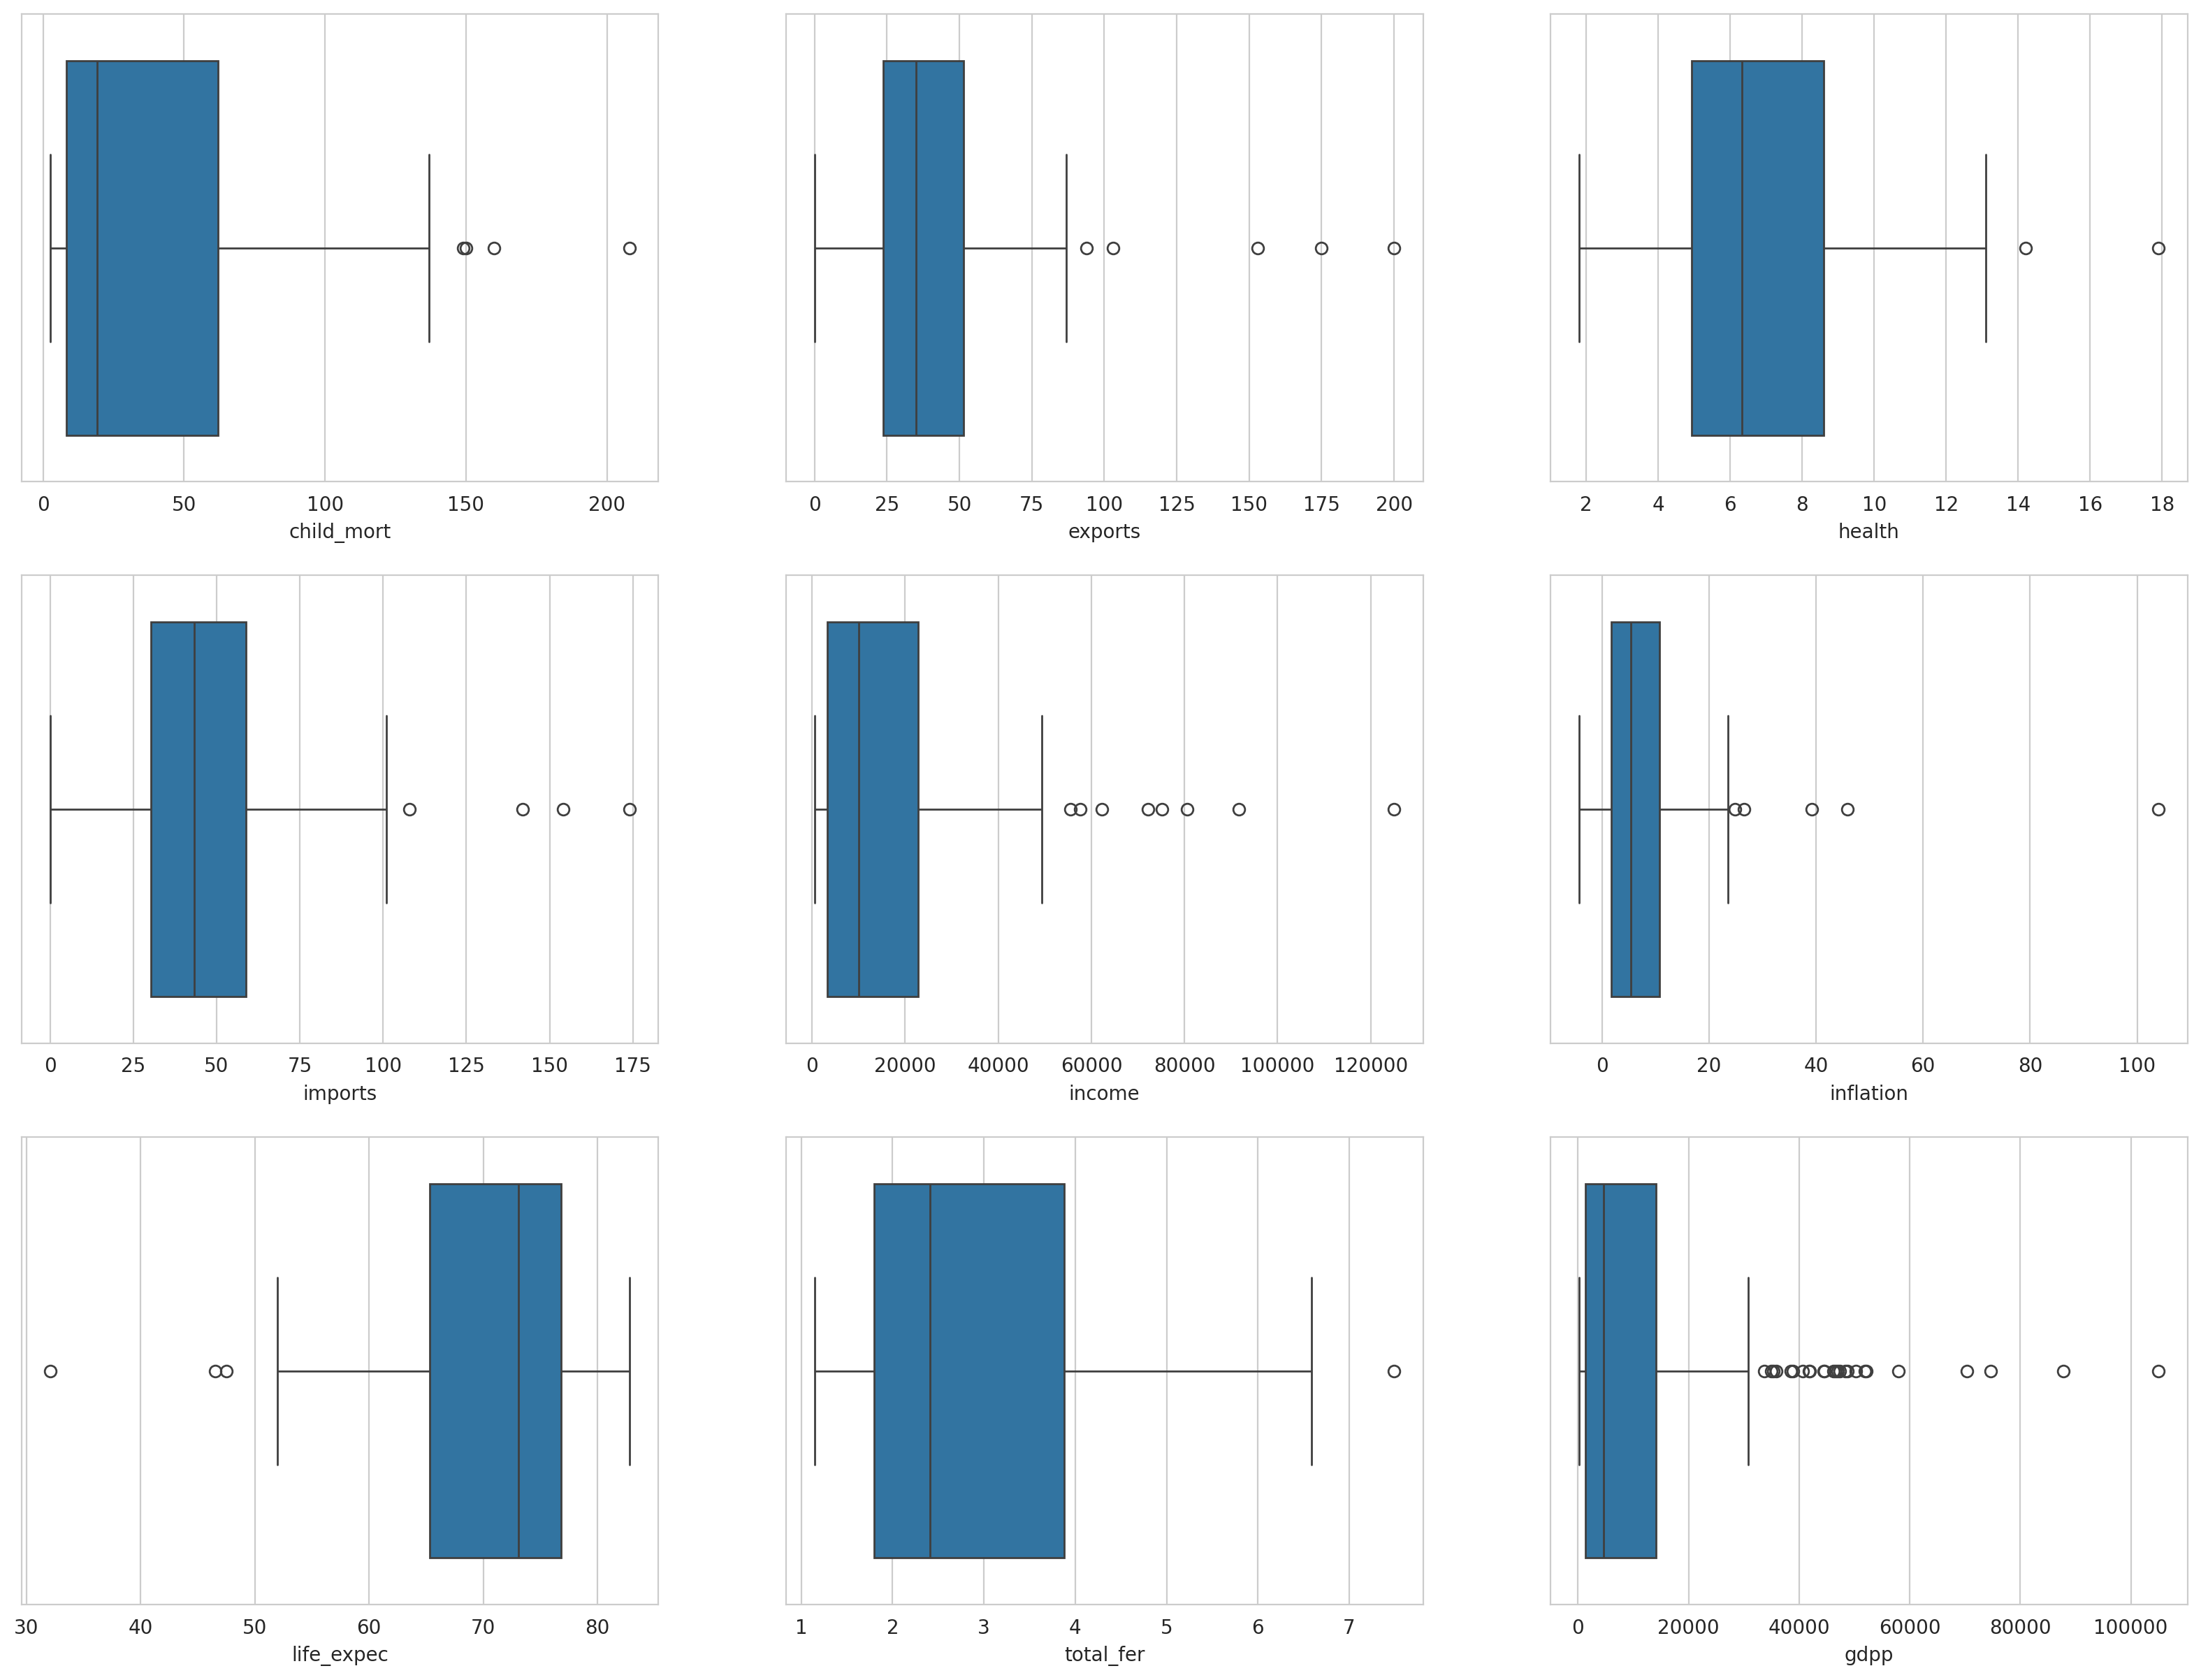

In [121]:
# checking for outliers using box-plots

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'child_mort', data = country_data)

plt.subplot(4,3,2)
sns.boxplot(x = 'exports', data = country_data)

plt.subplot(4,3,3)
sns.boxplot(x = 'health', data = country_data)

plt.subplot(4,3,4)
sns.boxplot(x = 'imports', data = country_data)

plt.subplot(4,3,5)
sns.boxplot(x = 'income', data = country_data)

plt.subplot(4,3,6)
sns.boxplot(x = 'inflation', data = country_data)

plt.subplot(4,3,7)
sns.boxplot(x = 'life_expec', data = country_data)

plt.subplot(4,3,8)
sns.boxplot(x = 'total_fer', data = country_data)

plt.subplot(4,3,9)
sns.boxplot(x = 'gdpp', data = country_data)

In [122]:
from scipy import stats

z = np.abs(stats.zscore(country_data[['child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp']]))
print(z)

print("\n")
print("*******************************************************************************")
print("\n")

# threshold = 3  # selecting 3 as the threshold to identify outliers
print('Below are the outlier points along with the respective column numbers in the second array')
print("\n")
print(np.where(z > 3))

     child_mort   exports    health   imports    income  inflation  \
0      1.291532  1.138280  0.279088  0.082455  0.808245   0.157336   
1      0.538949  0.479658  0.097016  0.070837  0.375369   0.312347   
2      0.272833  0.099122  0.966073  0.641762  0.220844   0.789274   
3      2.007808  0.775381  1.448071  0.165315  0.585043   1.387054   
4      0.695634  0.160668  0.286894  0.497568  0.101732   0.601749   
..          ...       ...       ...       ...       ...        ...   
162    0.225578  0.200917  0.571711  0.240700  0.738527   0.489784   
163    0.526514  0.461363  0.695862  1.213499  0.033542   3.616865   
164    0.372315  1.130305  0.008877  1.380030  0.658404   0.409732   
165    0.448417  0.406478  0.597272  0.517472  0.658924   1.500916   
166    1.114951  0.150348  0.338015  0.662477  0.721358   0.590015   

     life_expec  total_fer      gdpp  
0      1.619092   1.902882  0.679180  
1      0.647866   0.859973  0.485623  
2      0.670423   0.038404  0.465376  
3  

In [123]:
country_data_outliers_removed = country_data[(z<3).all(axis=1)]

In [124]:
country_data_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [125]:
print('Shape of dataframe before outlier removal: ' + str(country_data.shape))
print("\n")
print('Shape of dataframe after outlier removal: ' + str(country_data_outliers_removed.shape))

Shape of dataframe before outlier removal: (167, 10)


Shape of dataframe after outlier removal: (153, 10)


In [126]:
X = country_data_outliers_removed.drop('country',axis =1)
y = country_data_outliers_removed['country']

In [127]:
X.shape

(153, 9)

In [128]:
y.shape

(153,)

# PCA

In [129]:
X.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [130]:
y.head()

0            Afghanistan
1                Albania
2                Algeria
3                 Angola
4    Antigua and Barbuda
Name: country, dtype: object

In [131]:
# Standardization of the dataset before performing PCA

from sklearn.preprocessing import StandardScaler

In [132]:
scaler = StandardScaler()

In [133]:
X_scaled = scaler.fit_transform(X)

In [134]:
X_scaled[:5,:5]

array([[ 1.46183636, -1.41330427,  0.31809414, -0.04379952, -0.95456912],
       [-0.56911214, -0.52600184, -0.08875965,  0.15011384, -0.331921  ],
       [-0.27385196, -0.01333821, -1.02886841, -0.75132124, -0.10965359],
       [ 2.25655534,  1.16480224, -1.55027327, -0.14861755, -0.63351618],
       [-0.74295692,  0.3366533 , -0.29416156,  0.68992671,  0.354339  ]])

In [135]:
X.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

In [136]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)

In [137]:
X_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


<Axes: >

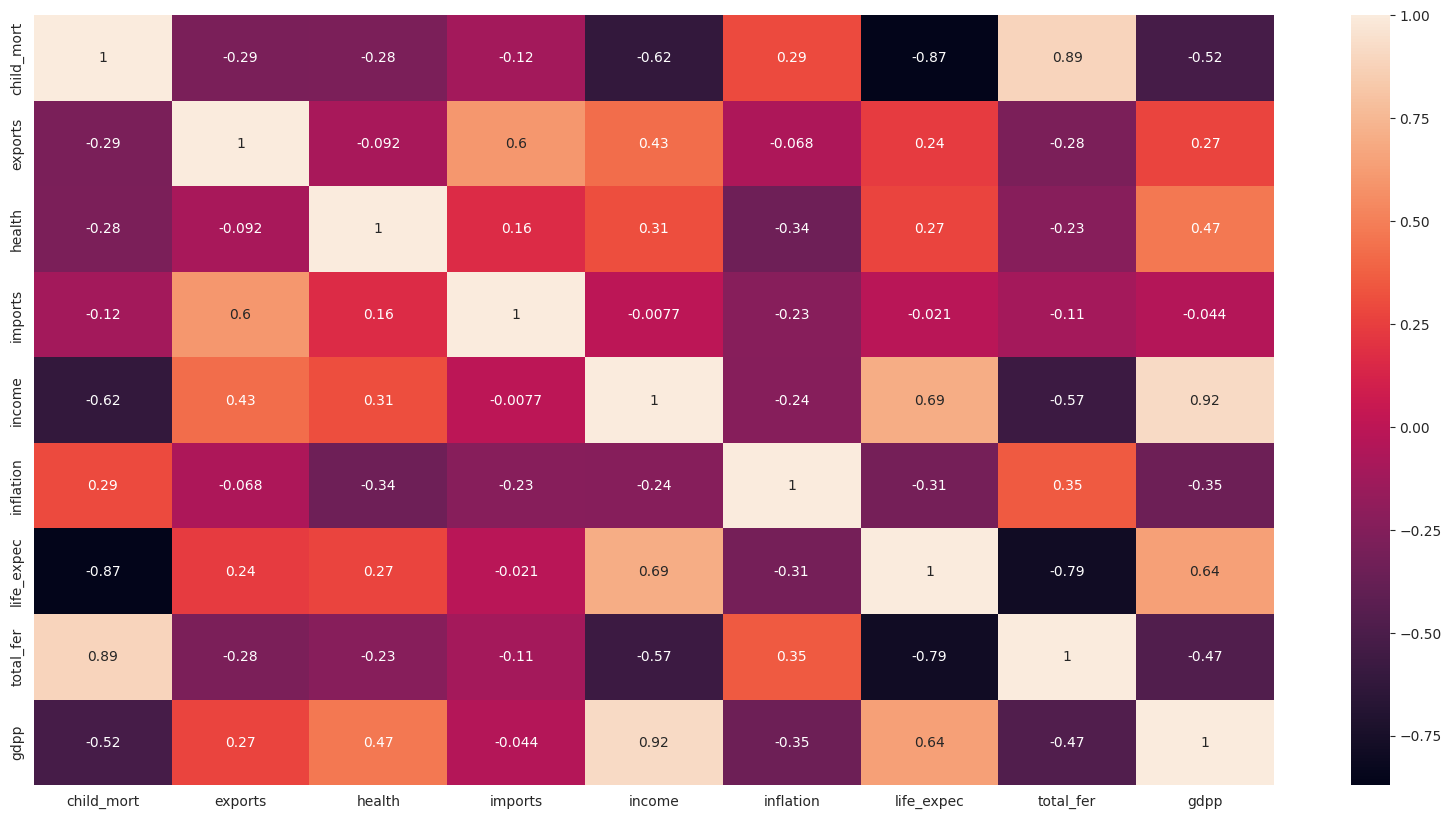

In [138]:
# Let's see the correlation matrix
plt.figure(figsize = (20,10))
sns.heatmap(X_scaled_df.corr(),annot = True)

In [139]:
from sklearn.decomposition import PCA

In [140]:
pca = PCA(random_state=42)

In [141]:
pca.fit(X_scaled)

PCA(random_state=42)

In [142]:
pca.components_[0]

array([-0.42321972,  0.2036042 ,  0.21754201,  0.08290998,  0.41369318,
       -0.22650995,  0.42715413, -0.40550525,  0.39482635])

In [143]:
pca.explained_variance_ratio_

array([0.47638387, 0.16902847, 0.13080614, 0.10179586, 0.06939066,
       0.02084938, 0.01747184, 0.00883956, 0.00543422])

In [144]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)
var_cumu

array([0.47638387, 0.64541234, 0.77621848, 0.87801434, 0.94740499,
       0.96825437, 0.98572622, 0.99456578, 1.        ])

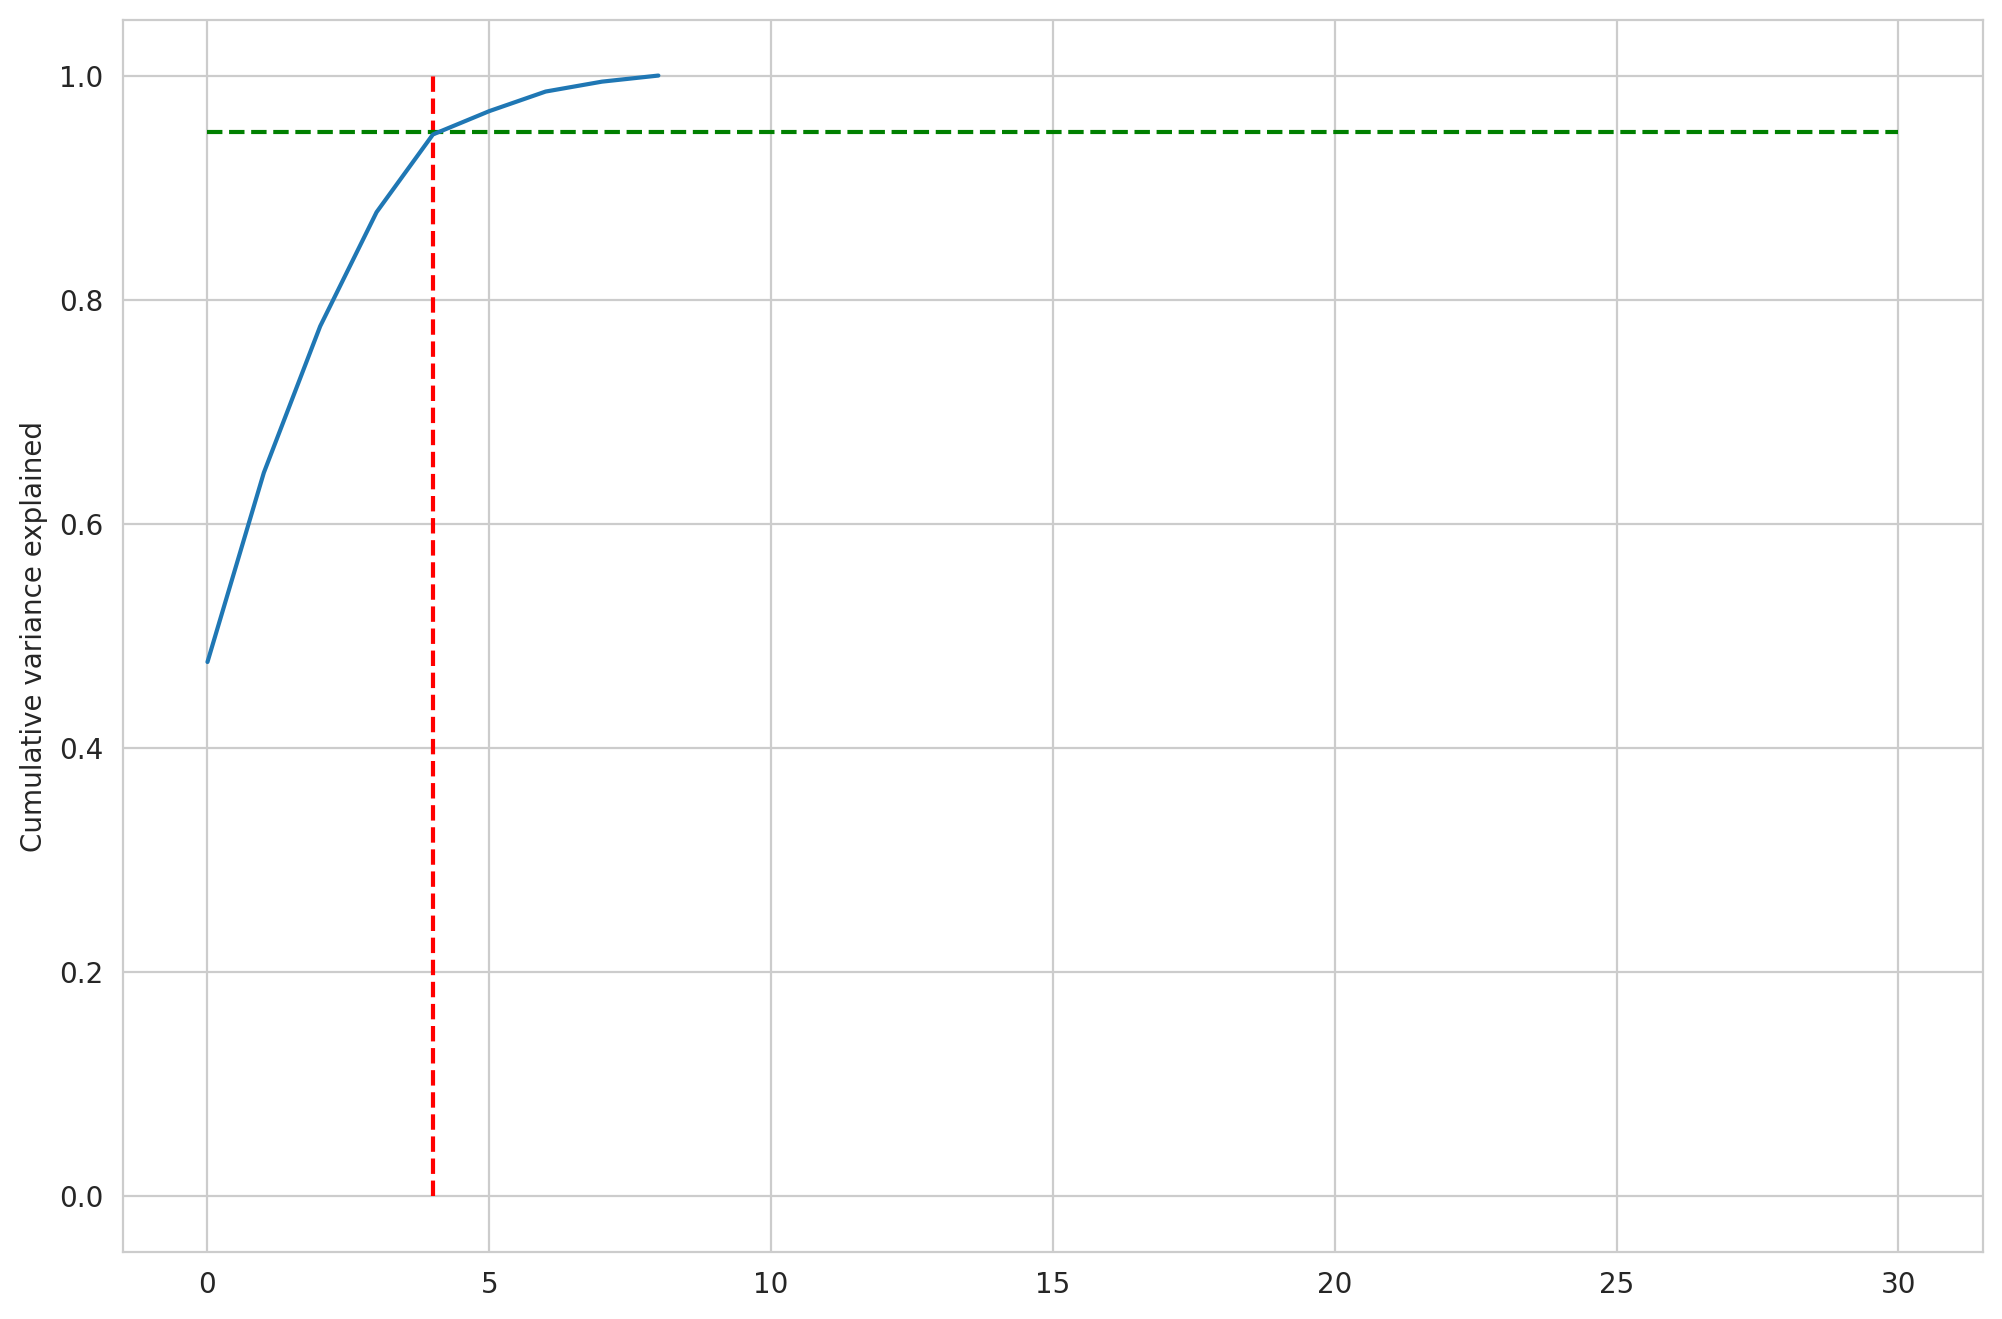

In [145]:
fig = plt.figure(figsize=[12,8],dpi=200)
plt.vlines(x=4, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [146]:
from sklearn.decomposition import IncrementalPCA

In [147]:
pca_final = IncrementalPCA(n_components=3)

In [148]:
X_pca_final = pca_final.fit_transform(X_scaled)

In [149]:
print(X.shape)
print(X_pca_final.shape)

(153, 9)
(153, 3)


In [150]:
corrmat = np.corrcoef(X_pca_final.transpose())

In [151]:
corrmat.shape

(3, 3)

<Axes: >

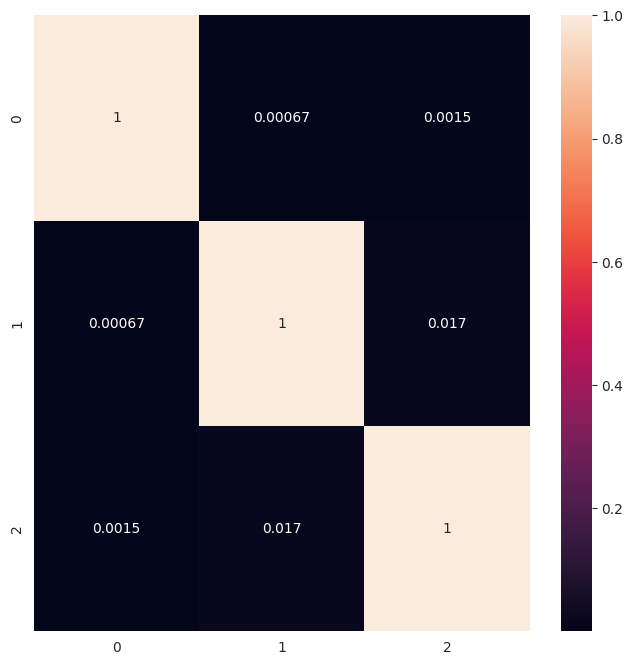

In [152]:
# Plotting the heatmap of the corr matrix
plt.figure(figsize=[8,8])
sns.heatmap(corrmat, annot=True)

# Clustering¶

K - means **clustering**

In [153]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [154]:
# k-means with some arbitrary k (number of clusters)
kmeans = KMeans(n_clusters=5, max_iter=1000)
kmeans.fit(X_pca_final)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=5)

In [155]:
kmeans.labels_

array([2, 3, 3, 2, 4, 3, 3, 0, 0, 3, 0, 4, 3, 4, 4, 0, 1, 2, 1, 3, 3, 1,
       3, 4, 2, 2, 1, 2, 0, 1, 2, 2, 3, 3, 3, 2, 2, 1, 3, 2, 3, 4, 4, 0,
       3, 3, 3, 3, 1, 2, 4, 1, 0, 0, 1, 2, 3, 0, 2, 0, 3, 3, 2, 2, 1, 4,
       0, 3, 3, 3, 1, 4, 0, 0, 3, 0, 1, 3, 2, 2, 1, 1, 4, 4, 2, 2, 4, 4,
       4, 2, 2, 4, 4, 2, 1, 4, 1, 1, 1, 4, 3, 2, 3, 1, 3, 0, 0, 4, 2, 4,
       1, 3, 3, 4, 0, 3, 3, 2, 1, 4, 2, 3, 4, 4, 4, 1, 2, 4, 0, 3, 3, 2,
       3, 0, 1, 2, 4, 2, 2, 3, 4, 3, 1, 2, 3, 4, 0, 3, 3, 1, 1, 2, 2],
      dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

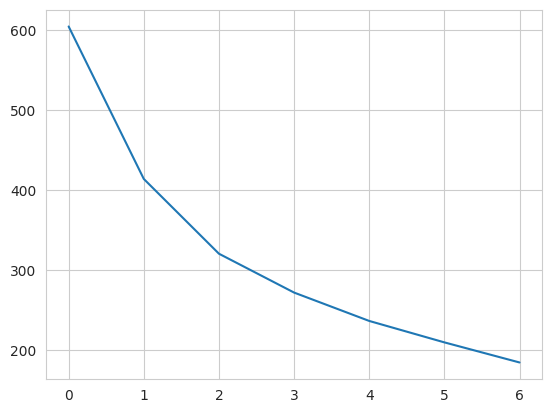

In [156]:
# elbow-curve/SSD
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)

    ssd.append(kmeans.inertia_)

# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)

Silhouette **Analysis**

In [157]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:

    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=1000)
    kmeans.fit(X_pca_final)

    cluster_labels = kmeans.labels_

    # silhouette score
    silhouette_avg = silhouette_score(X_pca_final, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.36138848782374994
For n_clusters=3, the silhouette score is 0.36752531202882316
For n_clusters=4, the silhouette score is 0.34260504975184053
For n_clusters=5, the silhouette score is 0.34474482545214374
For n_clusters=6, the silhouette score is 0.3265284676182996
For n_clusters=7, the silhouette score is 0.3070721633333404
For n_clusters=8, the silhouette score is 0.3044572067836582


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

In [158]:
# final model with k=3
kmeans = KMeans(n_clusters=4, max_iter=1000, random_state=42)
kmeans.fit(X_pca_final)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(max_iter=1000, n_clusters=4, random_state=42)

In [159]:
kmeans.labels_

array([3, 2, 2, 3, 0, 2, 2, 1, 1, 2, 1, 0, 2, 0, 0, 1, 0, 3, 0, 2, 2, 3,
       2, 0, 3, 3, 0, 3, 1, 2, 3, 3, 2, 2, 2, 3, 3, 3, 2, 3, 2, 1, 0, 1,
       2, 2, 2, 2, 3, 3, 0, 0, 1, 1, 2, 3, 2, 1, 3, 1, 2, 2, 3, 3, 0, 0,
       1, 2, 2, 2, 2, 1, 1, 1, 2, 1, 0, 2, 3, 3, 0, 3, 0, 0, 3, 3, 0, 0,
       0, 3, 3, 0, 0, 3, 3, 0, 3, 0, 2, 0, 2, 3, 2, 3, 2, 1, 1, 0, 3, 0,
       0, 2, 2, 0, 1, 2, 2, 3, 2, 0, 3, 2, 0, 0, 1, 3, 3, 1, 1, 2, 2, 3,
       2, 1, 2, 3, 0, 3, 3, 2, 0, 2, 0, 3, 2, 0, 1, 2, 2, 2, 0, 3, 3],
      dtype=int32)

In [160]:
country_data_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_

<ipython-input-160-0928ed5367ce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data_outliers_removed['K-Means_Cluster_ID'] = kmeans.labels_


In [161]:
country_data_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0


<Axes: xlabel='K-Means_Cluster_ID', ylabel='gdpp'>

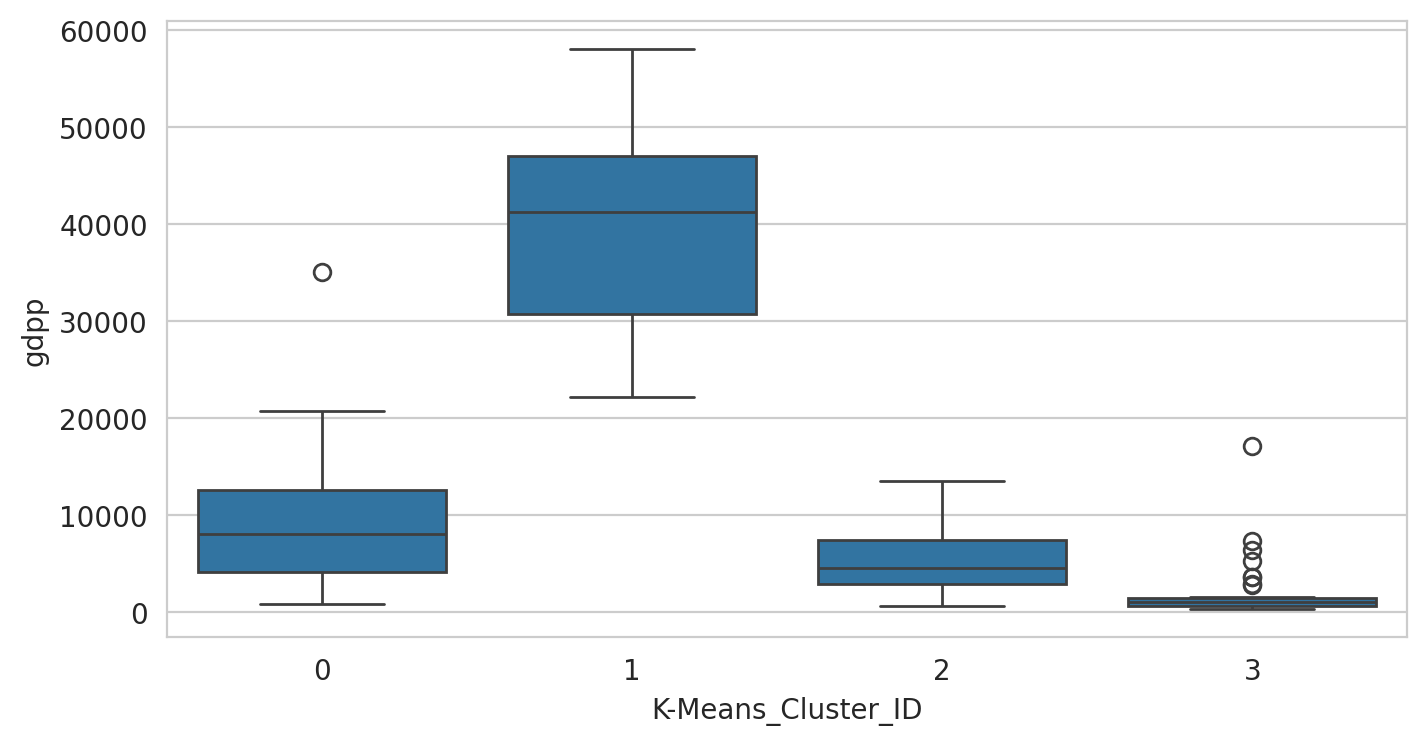

In [162]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=country_data_outliers_removed)

<Axes: xlabel='K-Means_Cluster_ID', ylabel='child_mort'>

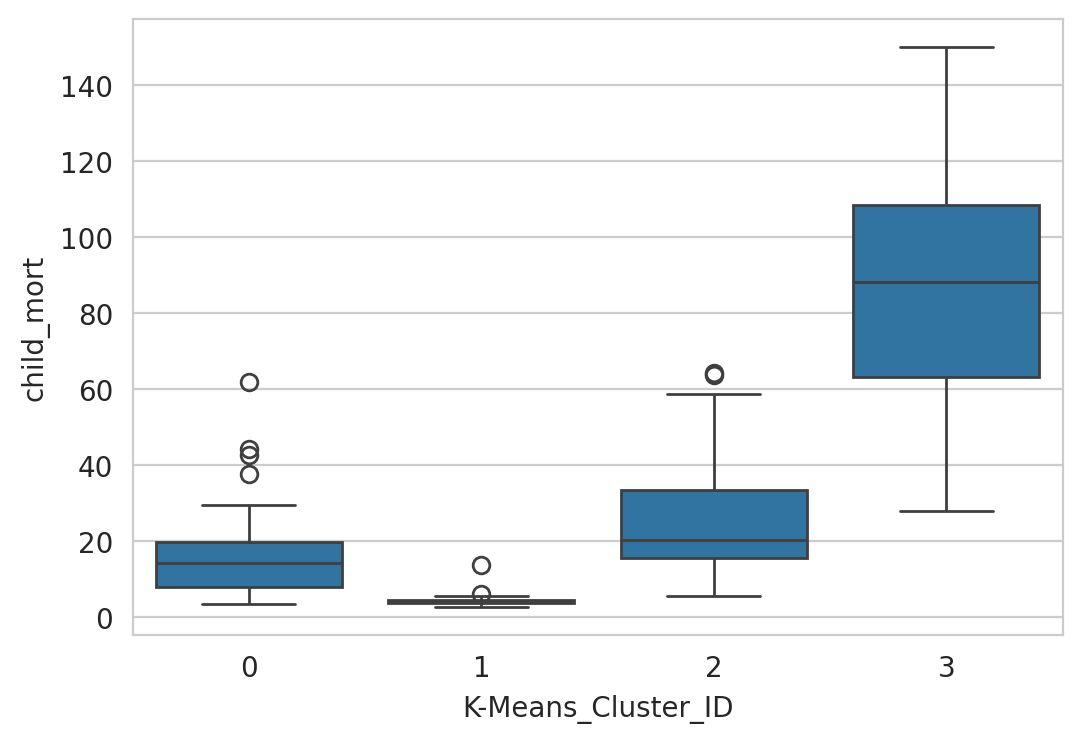

In [163]:
plt.figure(figsize=(6,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=country_data_outliers_removed)

<Axes: xlabel='K-Means_Cluster_ID', ylabel='income'>

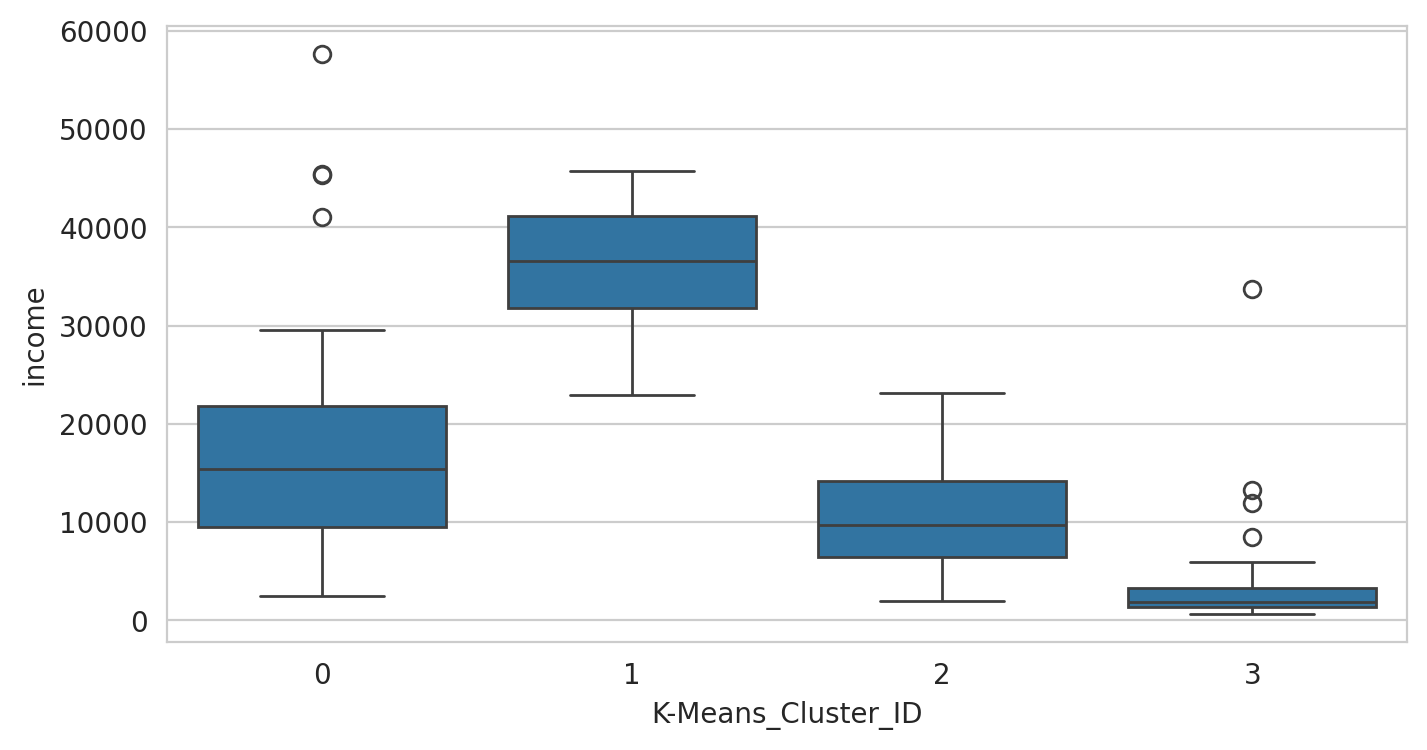

In [164]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='K-Means_Cluster_ID', y='income', data=country_data_outliers_removed)

# Hierarchical Clustering

In [165]:
X_scaled_df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.461836,-1.413304,0.318094,-0.043800,-0.954569,0.348785,-1.738235,1.944385,-0.722055
1,-0.569112,-0.526002,-0.088760,0.150114,-0.331921,-0.365865,0.712299,-0.886986,-0.467590
2,-0.273852,-0.013338,-1.028868,-0.751321,-0.109654,1.310315,0.736682,-0.045044,-0.440971
3,2.256555,1.164802,-1.550273,-0.148618,-0.633516,2.219869,-1.262759,2.175240,-0.507878
4,-0.742957,0.336653,-0.294162,0.689927,0.354339,-0.806205,0.773257,-0.561073,0.115874


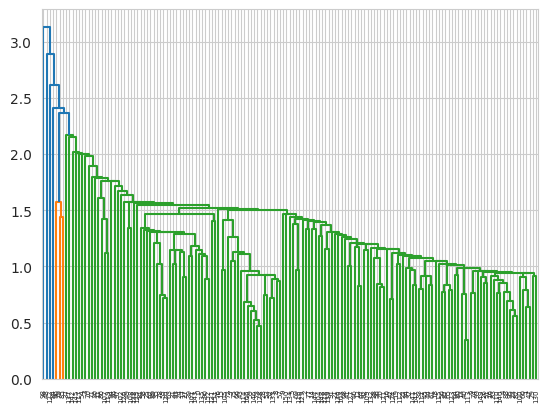

In [166]:
# single linkage
sl_mergings = linkage(X_scaled_df, method="single", metric='euclidean')
dendrogram(sl_mergings)
plt.show()

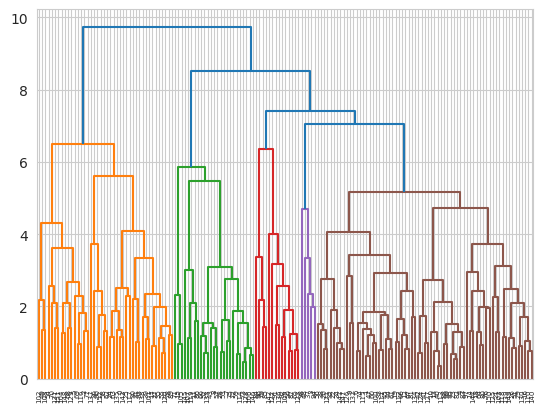

In [167]:
# complete linkage
cl_mergings = linkage(X_scaled_df, method="complete", metric='euclidean')
dendrogram(cl_mergings)
plt.show()

In [168]:
# 4 clusters using single linkge
sl_cluster_labels = cut_tree(sl_mergings, n_clusters=4).reshape(-1, )
sl_cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [169]:
# 4 clusters using complete linkage
cl_cluster_labels = cut_tree(cl_mergings, n_clusters=4).reshape(-1, )
cl_cluster_labels

array([0, 1, 0, 1, 1, 0, 1, 2, 2, 1, 1, 2, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 2, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 1, 0, 3, 1, 2, 2, 0, 0, 1, 2, 0, 2, 1, 1, 0, 0, 1, 3,
       2, 1, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 0, 3, 1, 1, 1, 1, 3, 3, 2, 3,
       1, 0, 0, 3, 3, 0, 1, 1, 3, 1, 1, 1, 1, 0, 0, 1, 0, 2, 2, 2, 0, 3,
       1, 1, 1, 1, 2, 1, 0, 0, 1, 2, 0, 1, 3, 3, 1, 1, 1, 1, 2, 0, 1, 0,
       1, 2, 1, 0, 3, 0, 0, 1, 1, 1, 3, 0, 1, 2, 2, 1, 0, 1, 1, 0, 0])

In [170]:
country_data_outliers_removed["Hierarchical_Cluster_labels"] = cl_cluster_labels

<ipython-input-170-6ae061bfc732>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  country_data_outliers_removed["Hierarchical_Cluster_labels"] = cl_cluster_labels


In [171]:
country_data_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1


<Axes: xlabel='Hierarchical_Cluster_labels', ylabel='gdpp'>

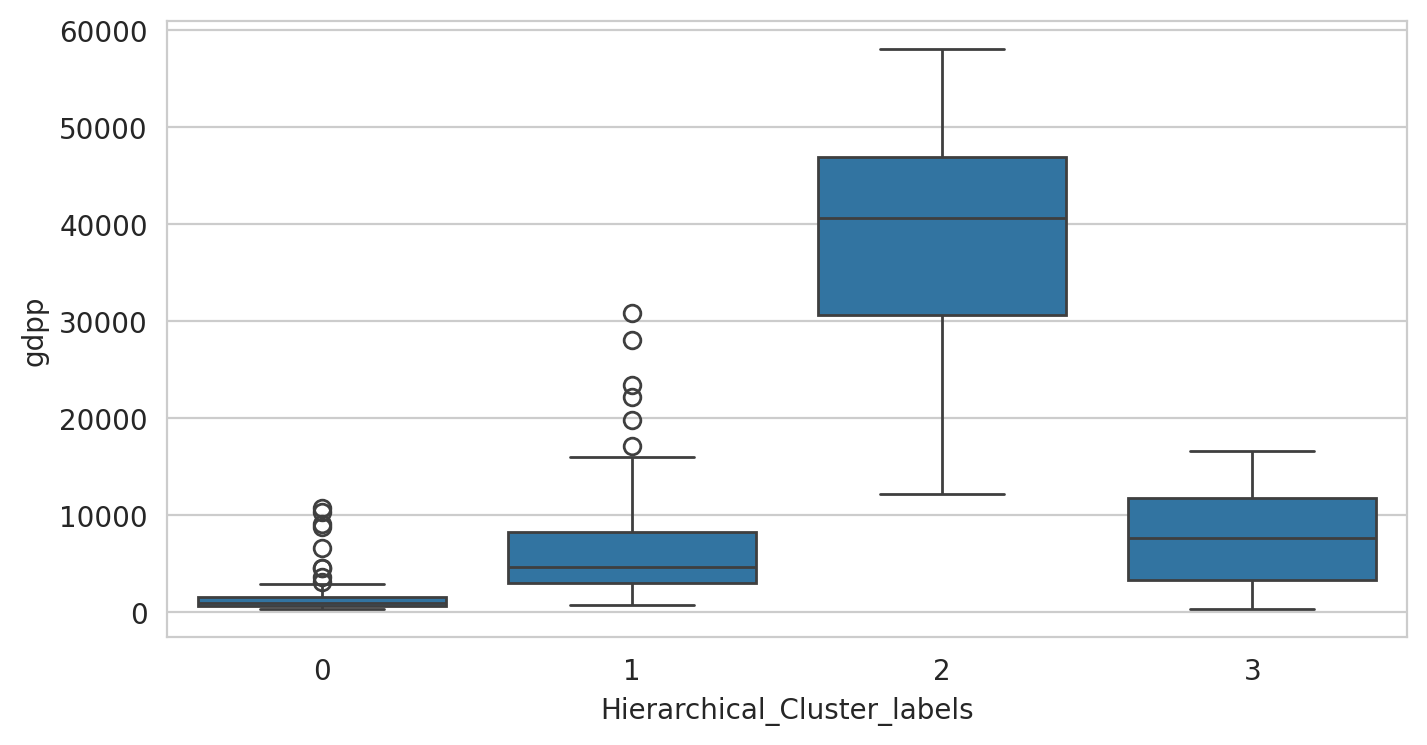

In [172]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='gdpp', data=country_data_outliers_removed)

<Axes: xlabel='Hierarchical_Cluster_labels', ylabel='child_mort'>

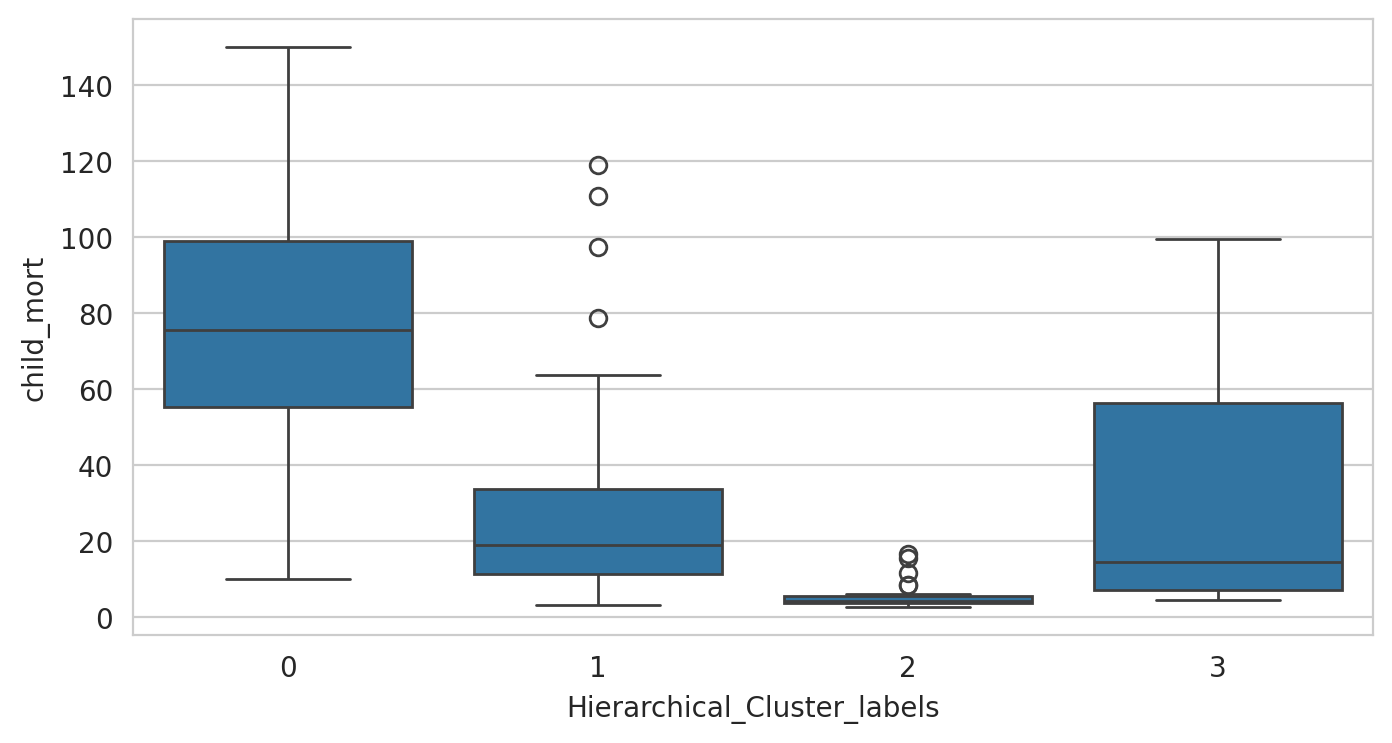

In [173]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='child_mort', data=country_data_outliers_removed)

<Axes: xlabel='Hierarchical_Cluster_labels', ylabel='income'>

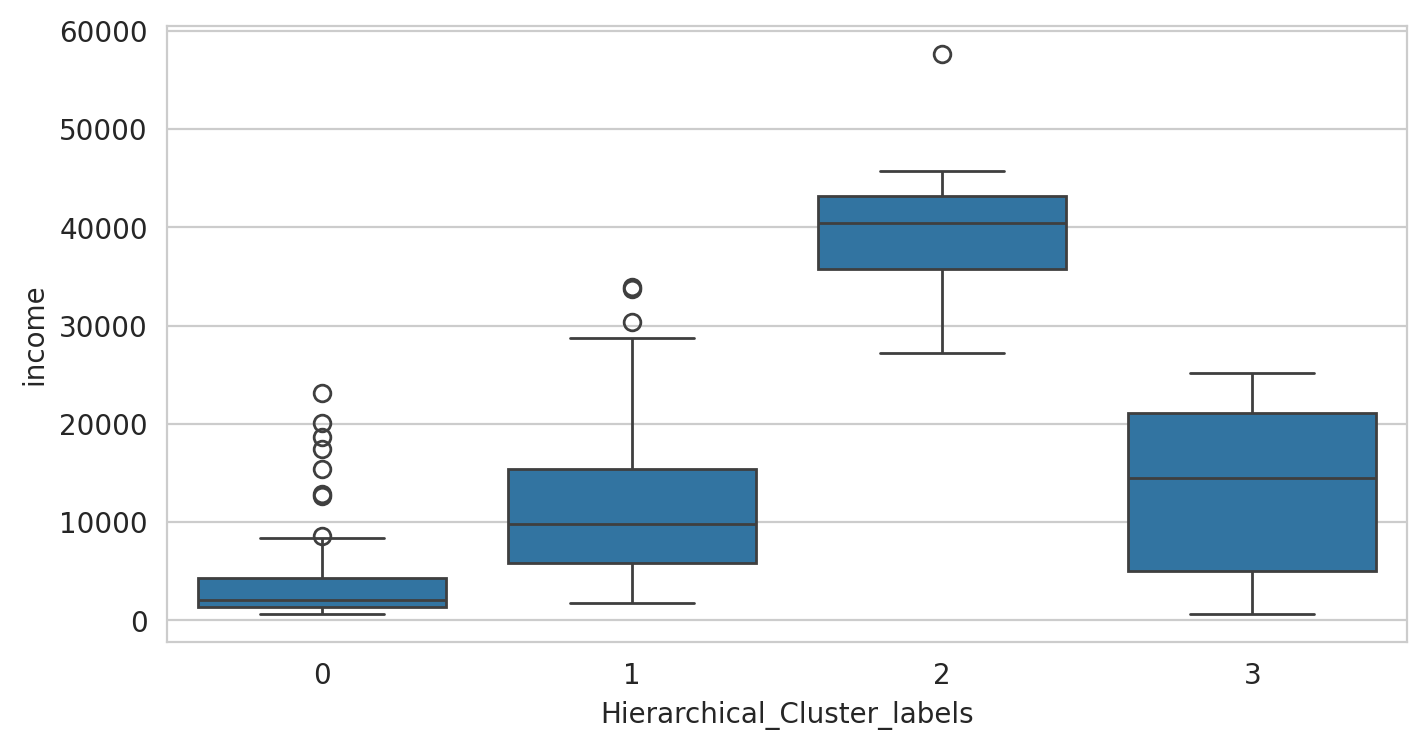

In [174]:
plt.figure(figsize=(8,4),dpi=200)
sns.boxplot(x='Hierarchical_Cluster_labels', y='income', data=country_data_outliers_removed)

In [175]:
country_data_outliers_removed.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,3,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,3,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0,1


<Axes: xlabel='Hierarchical_Cluster_labels', ylabel='income'>

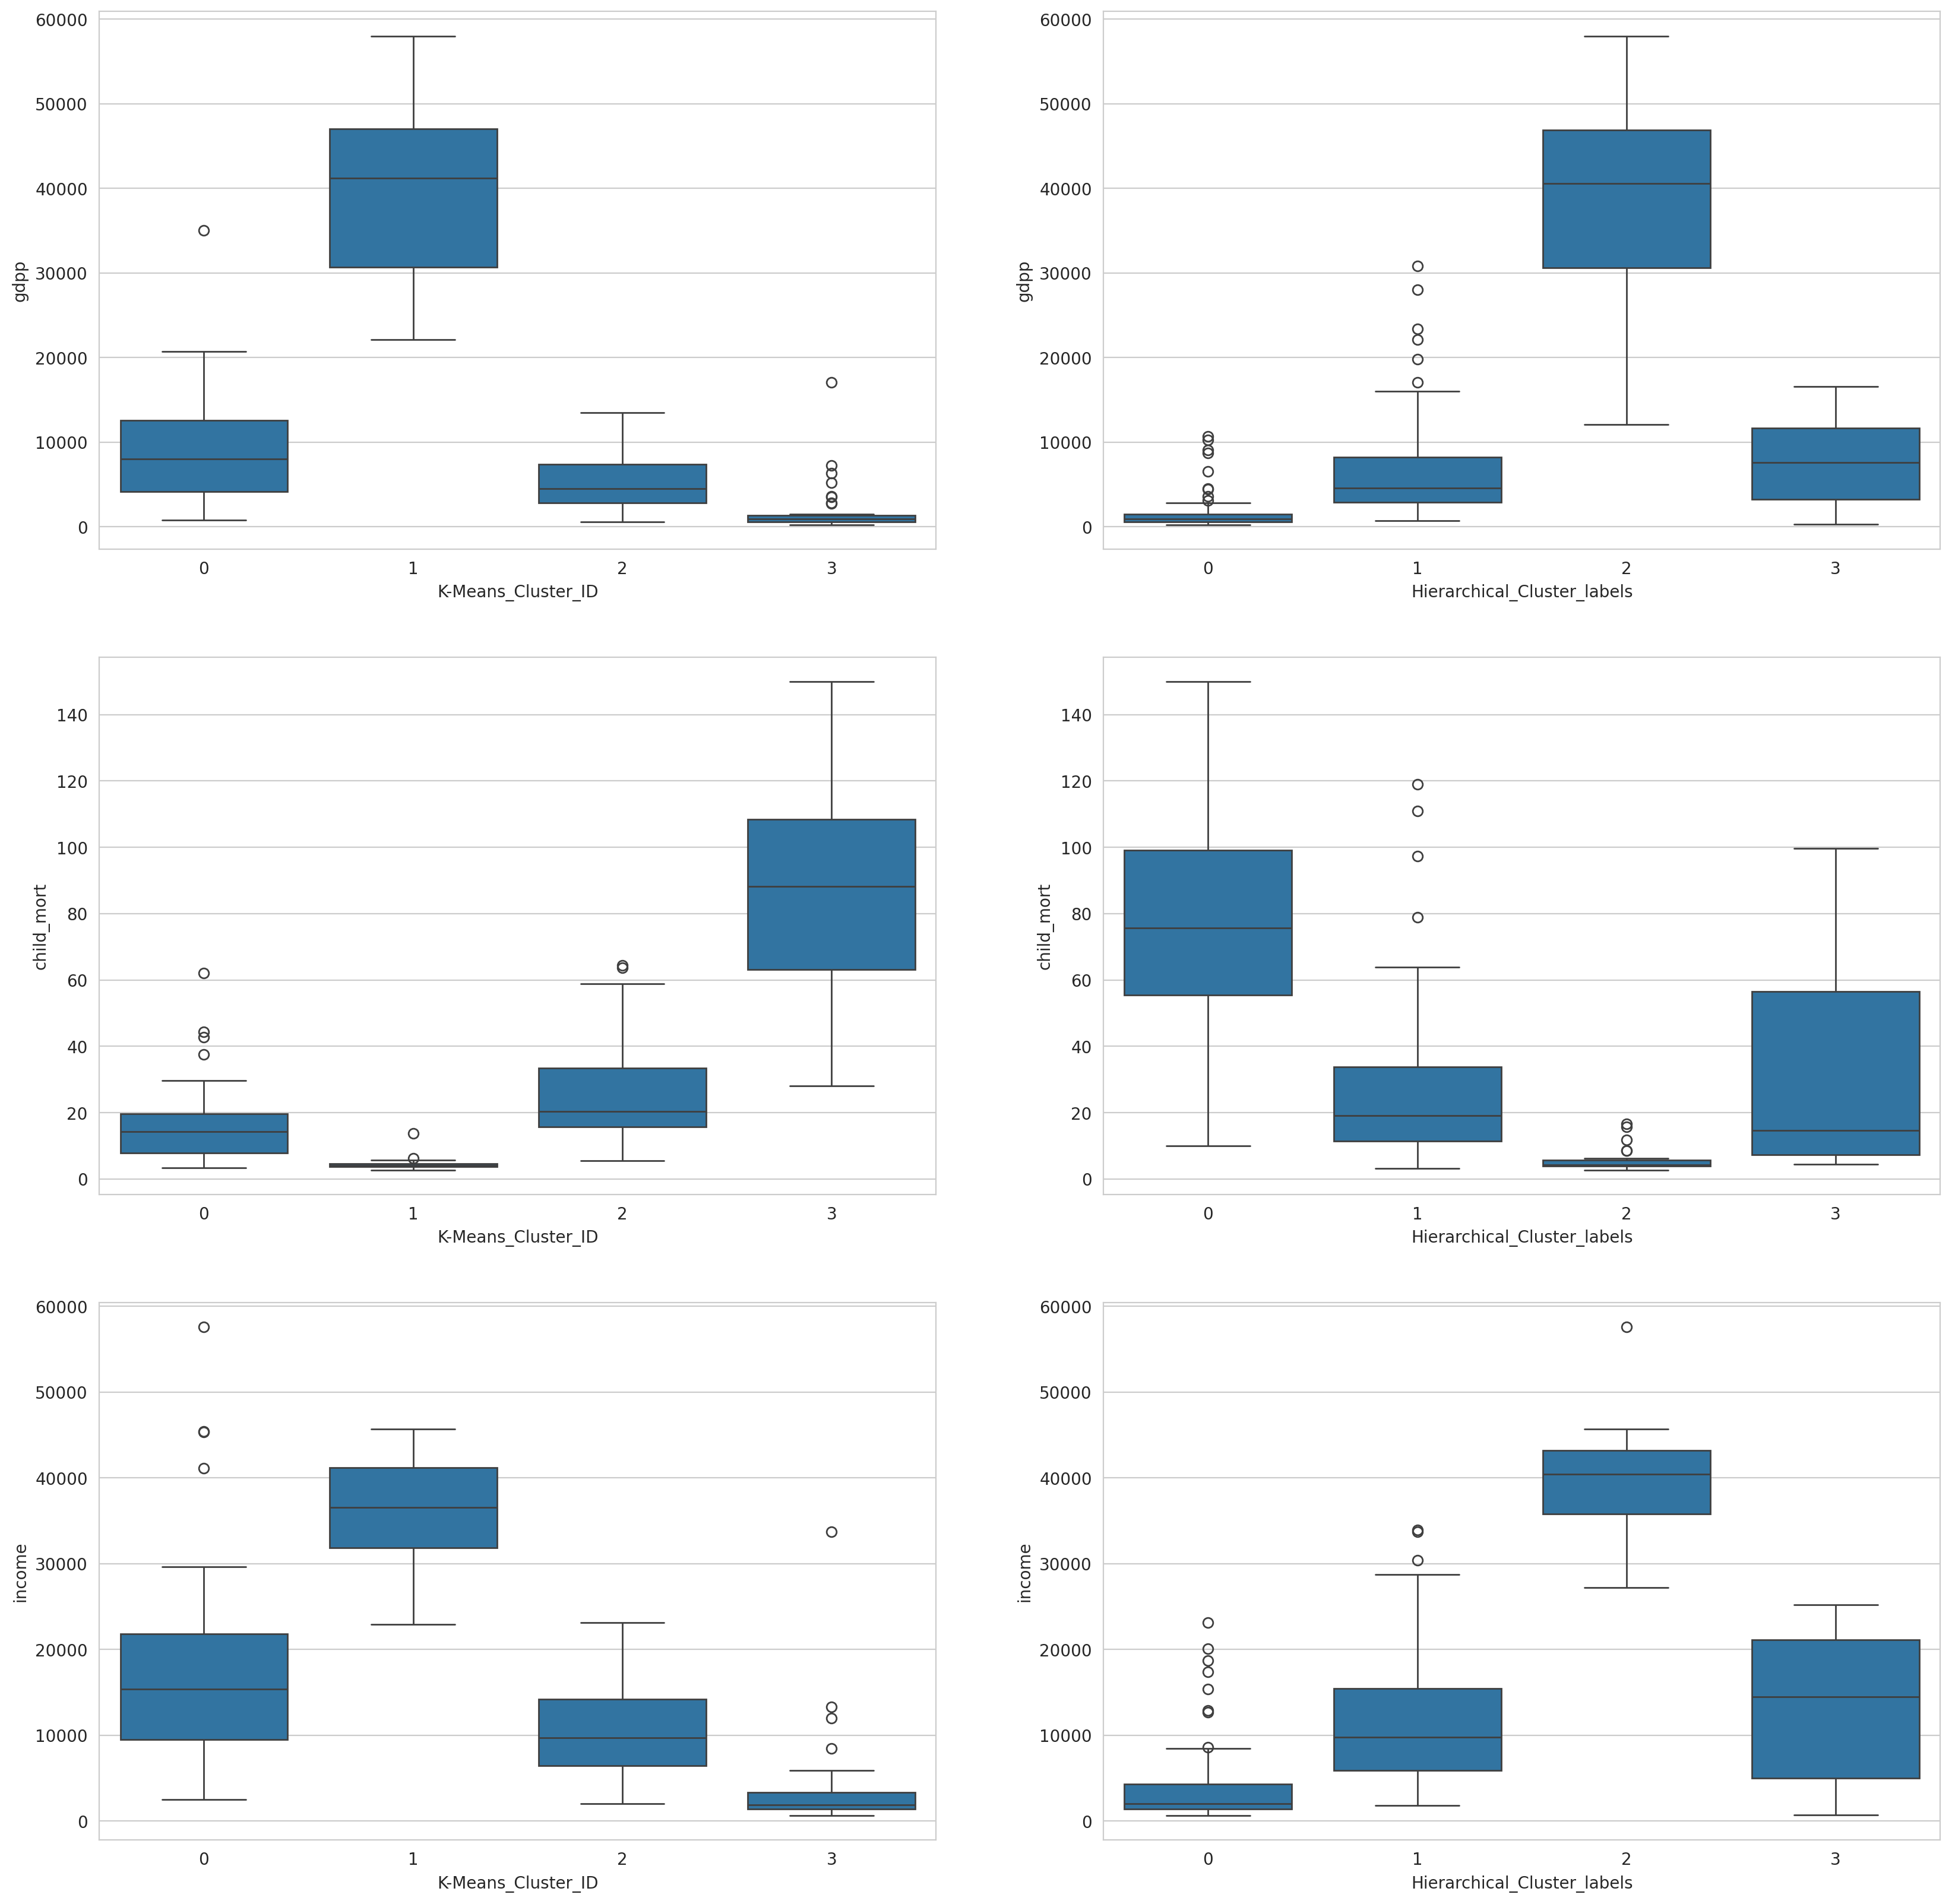

In [176]:
# plotting sub-plots to analyse the results

plt.figure(figsize=(20,20), dpi=200)

plt.subplot(3,2,1)
sns.boxplot(x='K-Means_Cluster_ID', y='gdpp', data=country_data_outliers_removed)

plt.subplot(3,2,2)
sns.boxplot(x='Hierarchical_Cluster_labels', y='gdpp', data=country_data_outliers_removed)

plt.subplot(3,2,3)
sns.boxplot(x='K-Means_Cluster_ID', y='child_mort', data=country_data_outliers_removed)

plt.subplot(3,2,4)
sns.boxplot(x='Hierarchical_Cluster_labels', y='child_mort', data=country_data_outliers_removed)

plt.subplot(3,2,5)
sns.boxplot(x='K-Means_Cluster_ID', y='income', data=country_data_outliers_removed)

plt.subplot(3,2,6)
sns.boxplot(x='Hierarchical_Cluster_labels', y='income', data=country_data_outliers_removed)

In [177]:
X_pca_final_df = pd.DataFrame(X_pca_final,columns=['PC1','PC2','PC3'],dtype='float32')

In [178]:
X_pca_final_df.head()

,PC1,PC2,PC3
0,-3.131831,-0.666757,1.375647
1,0.549820,-0.310643,-0.947826
2,-0.348584,-0.206672,-1.593872
3,-3.446717,1.534873,0.282068
4,1.304629,0.560326,-0.419766


In [179]:
X_pca_final_df['K_Means_Cluster_ID'] = kmeans.labels_
X_pca_final_df['Hierarchical_Cluster_Labels'] = cl_cluster_labels

In [180]:
X_pca_final_df.head()

,PC1,PC2,PC3,K_Means_Cluster_ID,Hierarchical_Cluster_Labels
0,-3.131831,-0.666757,1.375647,3,0
1,0.549820,-0.310643,-0.947826,2,1
2,-0.348584,-0.206672,-1.593872,2,0
3,-3.446717,1.534873,0.282068,3,1
4,1.304629,0.560326,-0.419766,0,1


<Axes: xlabel='PC1', ylabel='PC2'>

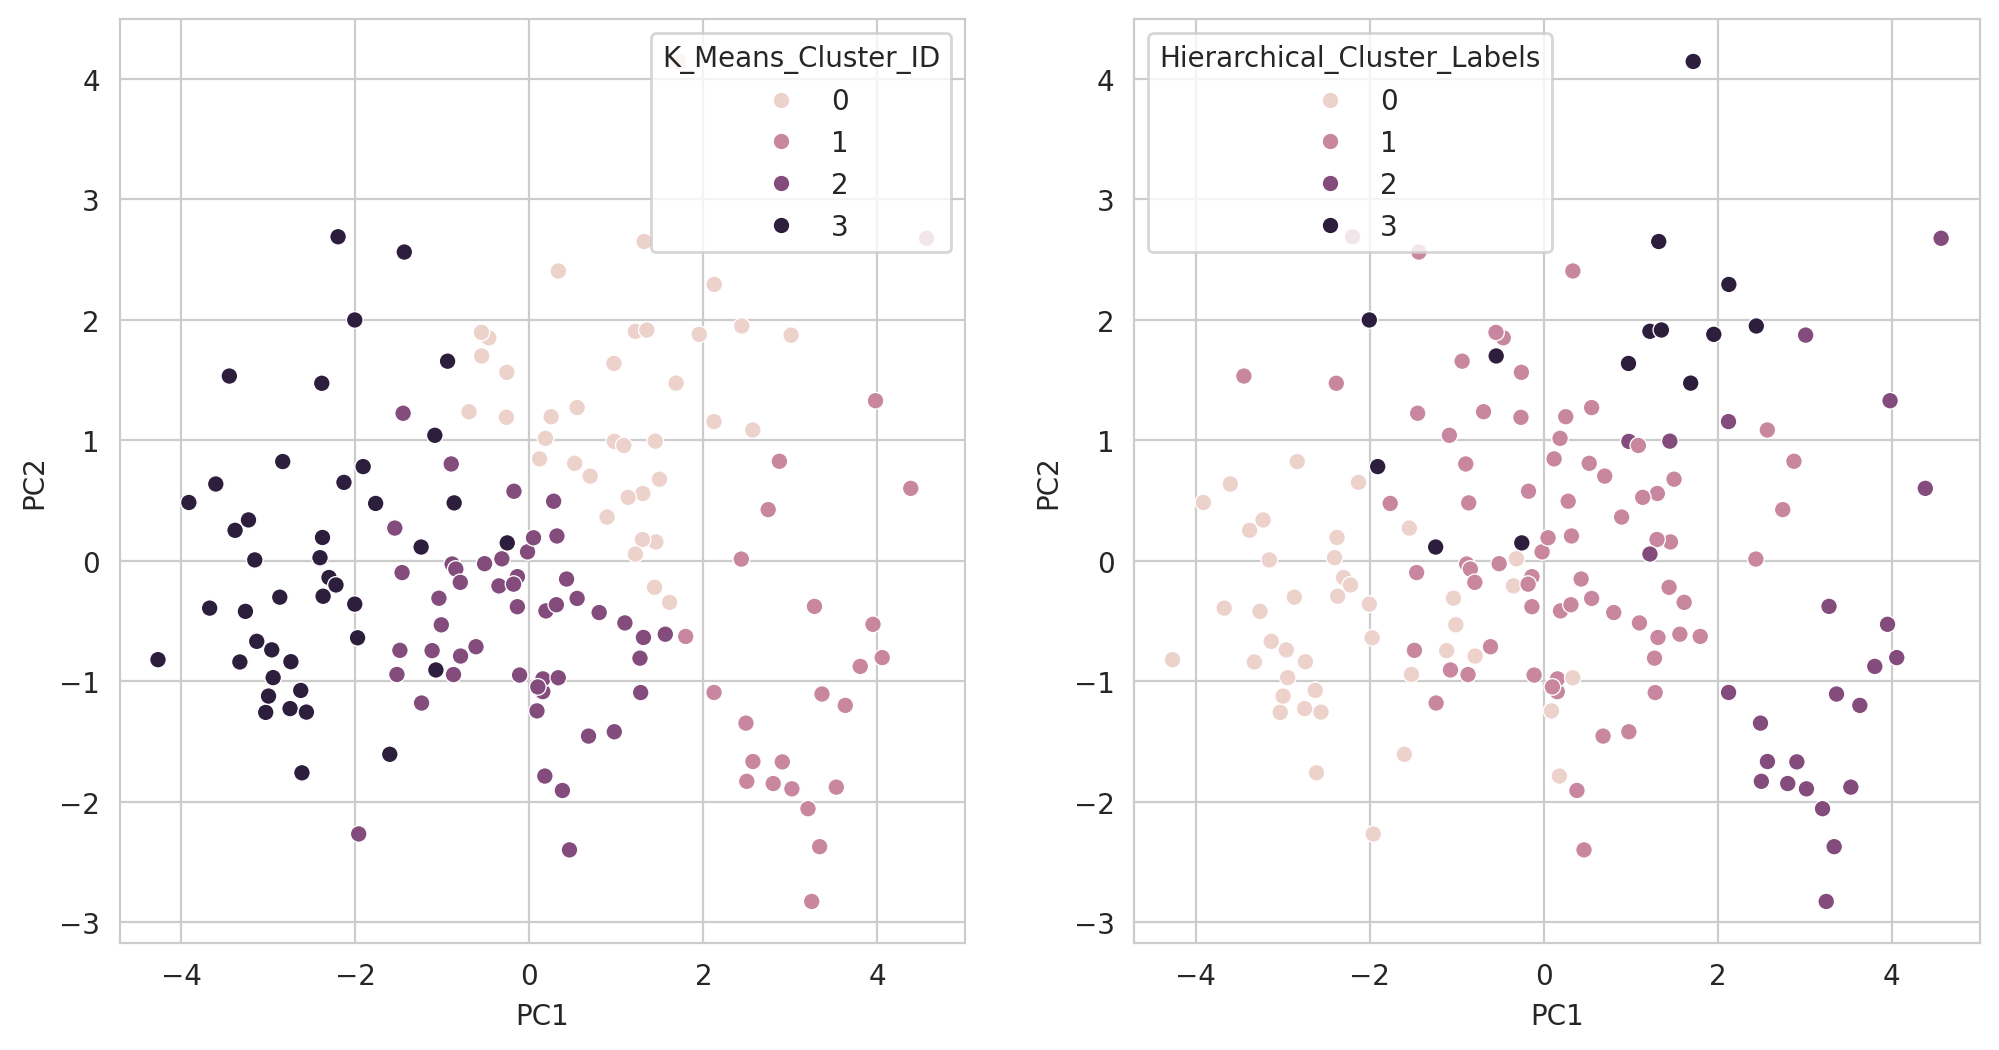

In [181]:
# scatter plot using the first two principal components to observe the cluster distribution

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='K_Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='PC1',y='PC2',data=X_pca_final_df,hue='Hierarchical_Cluster_Labels')

<Axes: xlabel='gdpp', ylabel='child_mort'>

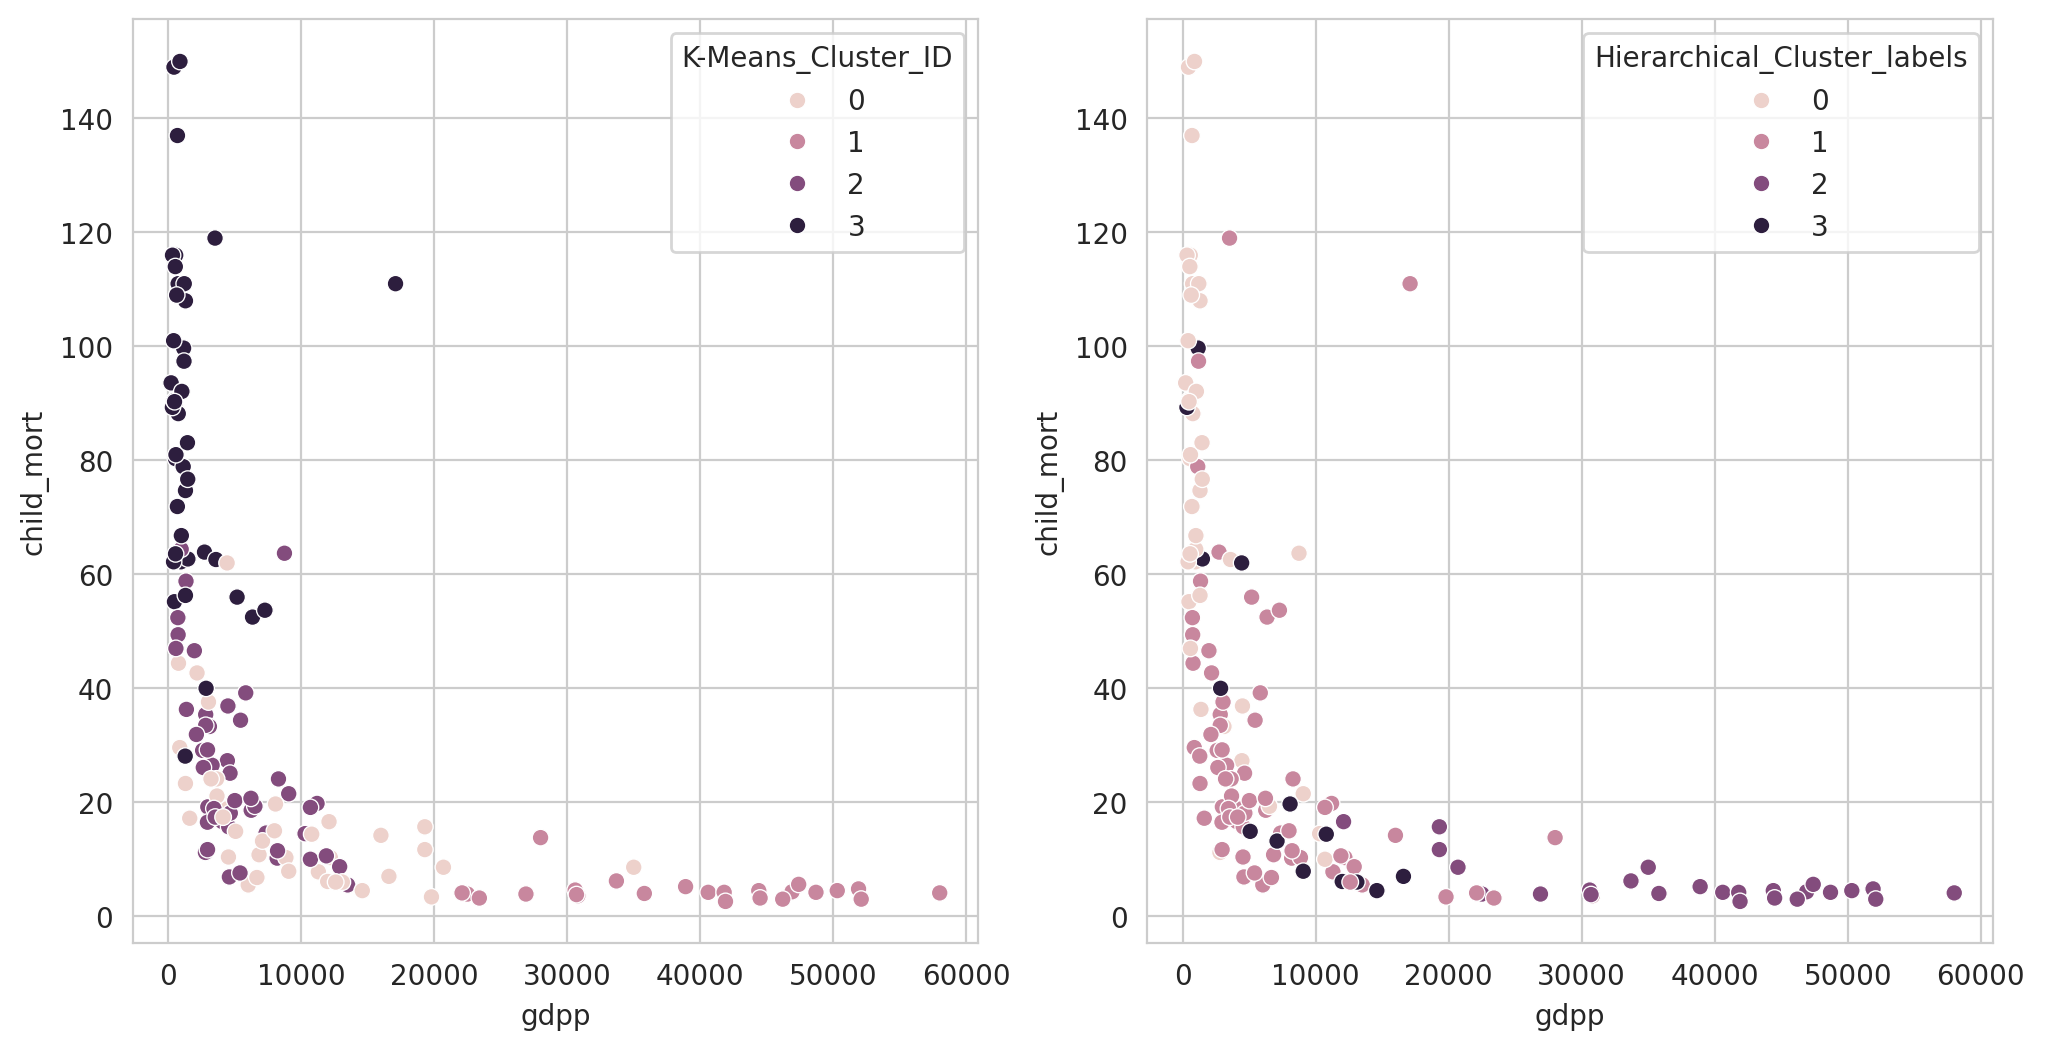

In [182]:
# scatter plot using the gdpp, child_mort to observe the cluster distribution

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='gdpp',y='child_mort',data=country_data_outliers_removed,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='gdpp',y='child_mort',data=country_data_outliers_removed,hue='Hierarchical_Cluster_labels')

<Axes: xlabel='gdpp', ylabel='income'>

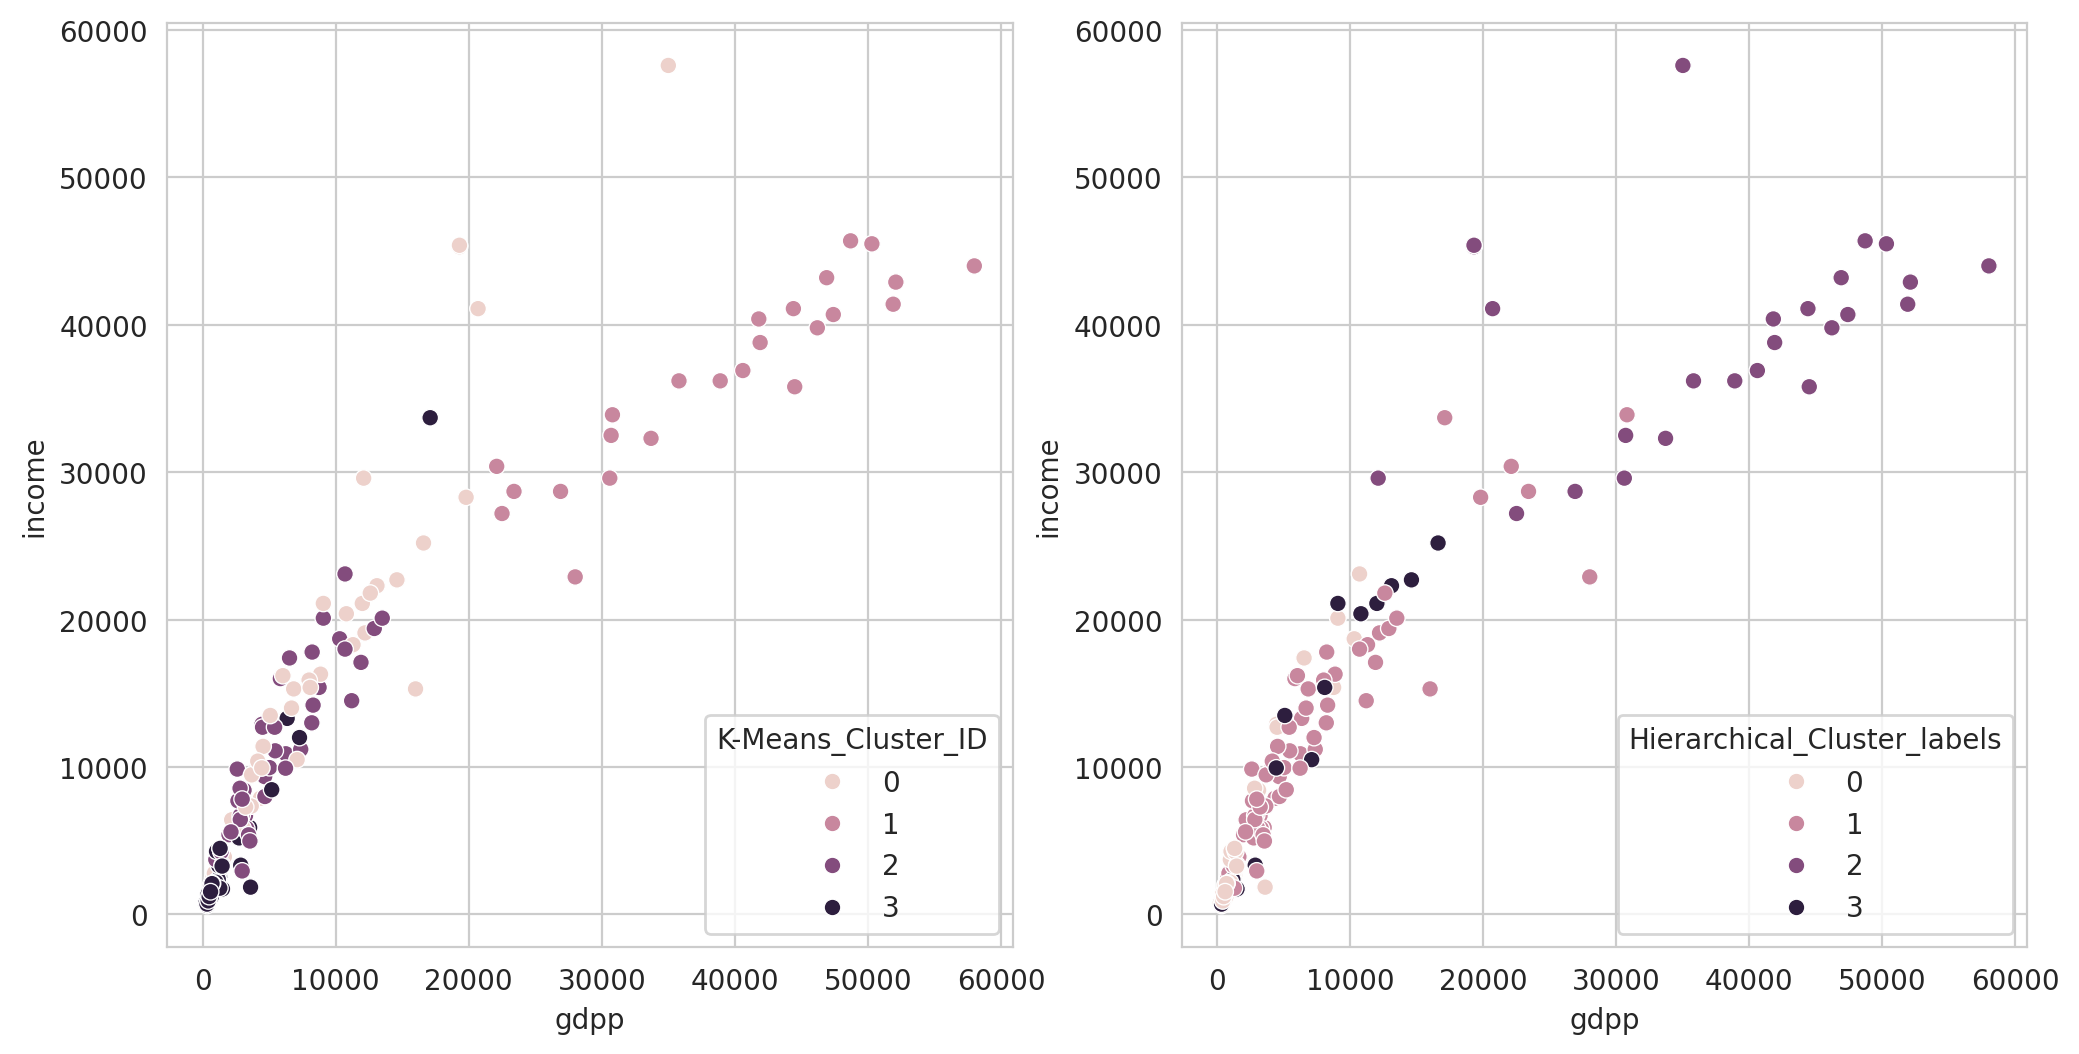

In [183]:
# scatter plot using the gdpp, income to observe the cluster distribution

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='gdpp',y='income',data=country_data_outliers_removed,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='gdpp',y='income',data=country_data_outliers_removed,hue='Hierarchical_Cluster_labels')

<Axes: xlabel='child_mort', ylabel='income'>

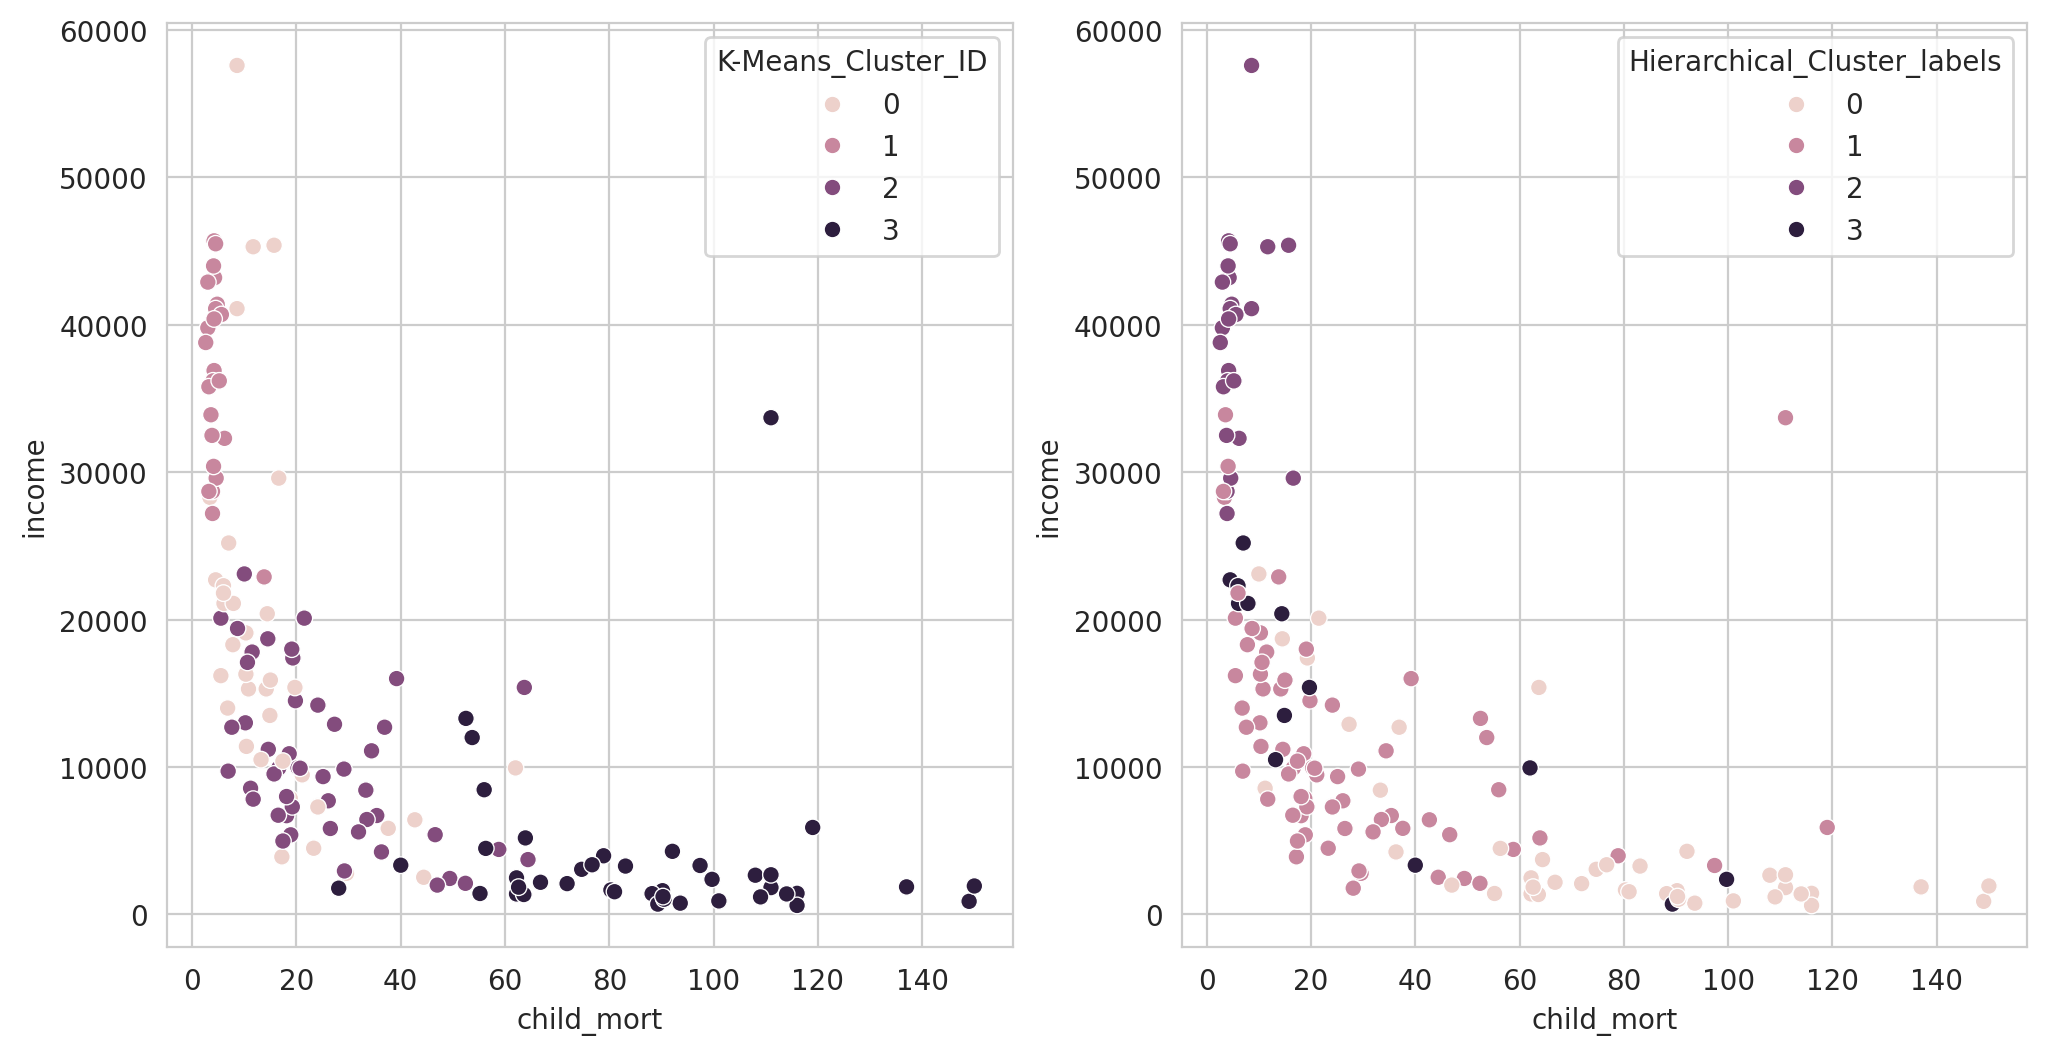

In [184]:
# scatter plot using the child_mort, income to observe the cluster distribution

plt.figure(figsize=(12,6),dpi=200)

plt.subplot(1,2,1)
sns.scatterplot(x='child_mort',y='income',data=country_data_outliers_removed,hue='K-Means_Cluster_ID')

plt.subplot(1,2,2)
sns.scatterplot(x='child_mort',y='income',data=country_data_outliers_removed,hue='Hierarchical_Cluster_labels')

# Countries which are in direst need of aid

In [185]:
K_Means_countries = country_data_outliers_removed[country_data_outliers_removed['K-Means_Cluster_ID'] == 1]
K_Means_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,1,2
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,1,2
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,1,1
15,Belgium,4.5,76.4,10.70,74.7,41100,1.880,80.0,1.86,44400,1,2
29,Canada,5.6,29.1,11.30,31.0,40700,2.870,81.3,1.63,47400,1,2
42,Cyprus,3.6,50.2,5.97,57.5,33900,2.010,79.9,1.42,30800,1,1
44,Denmark,4.1,50.5,11.40,43.6,44000,3.220,79.5,1.87,58000,1,2
53,Finland,3.0,38.7,8.95,37.4,39800,0.351,80.0,1.87,46200,1,2
54,France,4.2,26.8,11.90,28.1,36900,1.050,81.4,2.03,40600,1,2
58,Germany,4.2,42.3,11.60,37.1,40400,0.758,80.1,1.39,41800,1,2


In [186]:
Hirarchical_countries = country_data_outliers_removed[country_data_outliers_removed['Hierarchical_Cluster_labels'] == 0]
Hirarchical_countries

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,K-Means_Cluster_ID,Hierarchical_Cluster_labels
0,Afghanistan,90.2,10.000,7.58,44.9000,1610,9.440,56.2,5.82,553,3,0
2,Algeria,27.3,38.400,4.17,31.4000,12900,16.100,76.5,2.89,4460,2,0
5,Argentina,14.5,18.900,8.10,16.0000,18700,20.900,75.8,2.37,10300,2,0
17,Benin,111.0,23.800,4.10,37.2000,1820,0.885,61.8,5.36,758,3,0
25,Burkina Faso,116.0,19.200,6.74,29.6000,1430,6.810,57.9,5.87,575,3,0
26,Burundi,93.6,8.920,11.60,39.2000,764,12.300,57.7,6.26,231,3,0
28,Cameroon,108.0,22.200,5.13,27.0000,2660,1.910,57.3,5.11,1310,3,0
31,Central African Republic,149.0,11.800,3.98,26.5000,888,2.010,47.5,5.21,446,3,0
32,Chad,150.0,36.800,4.53,43.5000,1930,6.390,56.5,6.59,897,3,0
36,Comoros,88.2,16.500,4.51,51.7000,1410,3.870,65.9,4.75,769,3,0


In [187]:
len(Hirarchical_countries)

42

In [188]:
len(K_Means_countries)

24